# Credit Card Customers

A manager at a bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is going to get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction. 

This dataset consists of 10,000 customers mentioning their age, salary, marital status, credit card limit, credit card category, etc. There are 20 features.

Data Source: <br>
https://www.kaggle.com/sakshigoyal7/credit-card-customers 

In this project, we will analyze the dataset and try to see if we can gleam any patterns or characteritics of churning customers. Then, we are going to build a simple machine learning model to predict whether a customer will leave the credit card service or not. 
<br>

# Importing the dataset 

In this section, we are going to import the dataset and check the first few rows of data. 

In [1]:
import pandas as pd 

dataset = pd.read_csv("Credit Card Customers.csv")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Then, we are going to check if there are any missing values that we need to take care of. 

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Light data cleaning 

The dataset used does not have any missing values. However, there is still some cleaning that can be done. 
In this section, we are going to drop the CLIENTNUM (Client Number) column as it is not necessary for our data analysis. Then, we will rename the columns to make them easier to refer to. 

In [3]:
dataset = dataset.drop("CLIENTNUM", axis = 1)
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
dataset.columns = [
    "Attrition Flag",
    "Age", 
    "Gender", 
    "Dependent Count", 
    "Education Level",
    "Marital Status",
    "Income Category", 
    "Card Category",
    "Months on Book", 
    "Relationship Count",
    "Inactive Months", 
    "Contacts Count",
    "Credit Limit",
    "Total Revolving Balance",
    "Average Open to Buy",
    "Amount Change Q4 to Q1",
    "Transaction Amount",
    "Transaction Count", 
    "Transaction Count Change Q4 to Q1",
    "Utilization Ratio"
]
dataset.head()

,Attrition Flag,Age,Gender,Dependent Count,Education Level,Marital Status,Income Category,Card Category,Months on Book,Relationship Count,Inactive Months,Contacts Count,Credit Limit,Total Revolving Balance,Average Open to Buy,Amount Change Q4 to Q1,Transaction Amount,Transaction Count,Transaction Count Change Q4 to Q1,Utilization Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Exploratory data analysis 

Now that our dataset has been cleaned, it's time to do some exploratory data analysis. 

In [5]:
dataset.describe()

,Age,Dependent Count,Months on Book,Relationship Count,Inactive Months,Contacts Count,Credit Limit,Total Revolving Balance,Average Open to Buy,Amount Change Q4 to Q1,Transaction Amount,Transaction Count,Transaction Count Change Q4 to Q1,Utilization Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
dataset.describe(include = "all")

,Attrition Flag,Age,Gender,Dependent Count,Education Level,Marital Status,Income Category,Card Category,Months on Book,Relationship Count,Inactive Months,Contacts Count,Credit Limit,Total Revolving Balance,Average Open to Buy,Amount Change Q4 to Q1,Transaction Amount,Transaction Count,Transaction Count Change Q4 to Q1,Utilization Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [7]:
#Calculating the percentage of Attrited Customers 

attrited_percent = dataset["Attrition Flag"].value_counts()[1] / len(dataset["Attrition Flag"])
print("The percentage of Attrited Customers in this dataset: ", "{:.2%}".format(attrited_percent))

The percentage of Attrited Customers in this dataset:  16.07%


In [8]:
#Calculating the counts of Categorical Data 

print("------------------------------------------------------------------")
for feature in ["Attrition Flag", "Gender", "Dependent Count", 
                "Education Level", "Marital Status", "Income Category", 
                "Card Category"]: 
    print(feature)
    print("\n")
    print(dataset[feature].value_counts())
    print("------------------------------------------------------------------")

------------------------------------------------------------------
Attrition Flag


Existing Customer    8500
Attrited Customer    1627
Name: Attrition Flag, dtype: int64
------------------------------------------------------------------
Gender


F    5358
M    4769
Name: Gender, dtype: int64
------------------------------------------------------------------
Dependent Count


3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent Count, dtype: int64
------------------------------------------------------------------
Education Level


Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education Level, dtype: int64
------------------------------------------------------------------
Marital Status


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital Status, dtype: int64
---------------------------------------------------------------

# Findings from Exploratory Data Analysis

So, based on our exploratory analysis, we can see the main findings below:
* Only 16% of customers are "attrited" i.e. they have left their credit card services
* The average age of customers is 46 years old 
* 53% of customers are female 
* 50% of customers have a college degree or higher level of education 
* 36% of customers earn more than 60K per year 
* The average number of dependents per customer is 2.3
* The average customer spends 36 months on book 
* Customers are inactive for an average of 2.3 months 
* Customers are contacted an average of 2.4 times 
* The average credit limit is 8632 dollars 
* The average transaction amount is 4404 dollars 
* The average transaction count is 64.9

# Comparing attrited to existing customers 

In this section, we will compare the features between attrited customers and existing customers. 

In [9]:
attrited_dataset = dataset.loc[dataset["Attrition Flag"] == "Attrited Customer"]
existing_dataset = dataset.loc[dataset["Attrition Flag"] == "Existing Customer"]

In [10]:
dataset.groupby(['Attrition Flag']).mean()

,Age,Dependent Count,Months on Book,Relationship Count,Inactive Months,Contacts Count,Credit Limit,Total Revolving Balance,Average Open to Buy,Amount Change Q4 to Q1,Transaction Amount,Transaction Count,Transaction Count Change Q4 to Q1,Utilization Ratio
Attrition Flag,,,,,,,,,,,,,,
Attrited Customer,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [11]:
print("------------------------------------------------------------------")
for feature in ["Gender", "Dependent Count", 
                "Education Level", "Marital Status", "Income Category", 
                "Card Category"]: 
    feature_data = {'Attrited Customers': 
                        (attrited_dataset[feature].value_counts().sort_index(ascending=True)/len(attrited_dataset))*100,
                    'Existing Customers': 
                        (existing_dataset[feature].value_counts().sort_index(ascending=True)/len(existing_dataset))*100}
    feature_dataframe = pd.DataFrame(feature_data)
    print(feature, "Pecentage Values")
    print(feature_dataframe)
    print("------------------------------------------------------------------")

------------------------------------------------------------------
Gender Pecentage Values
   Attrited Customers  Existing Customers
F           57.160418           52.094118
M           42.839582           47.905882
------------------------------------------------------------------
Dependent Count Pecentage Values
   Attrited Customers  Existing Customers
0            8.297480            9.047059
1           16.533497           18.458824
2           25.629994           26.329412
3           29.625077           26.470588
4           15.980332           15.458824
5            3.933620            4.235294
------------------------------------------------------------------
Education Level Pecentage Values
               Attrited Customers  Existing Customers
College                  9.465274           10.105882
Doctorate                5.838967            4.188235
Graduate                29.932391           31.070588
High School             18.807621           20.082353
Post-Graduate      

Based on the data presented above, it is rather difficult to determine specific features that affect whether a customer will be attrited or not. 

However, some insights can be gleamed:

* The average credit limit for attrited customers is 8136 dollars while it is 8726 for existing customers. 
* The average total revolving balance for attrited customers is much lower at 673 while the average is 1256 for existing customers.
* The following values are also significantly different between attrited and existing customers:
    * Amount change Q4 to Q1 
    * Transaction Amount
    * Transaction Count
    * Transaction Count Change Q4 to Q1 
    * Utilization Ratio

* A larger percentage of attrited customers are female 
    
**Note:** Confidence intervals can be calculated to determine whether the differences between the categories are statistically significant. 

# Data visualizations

In this section, we will create some graphs and data visualizations to better understand the dataset and its features. 

Based on the previous analysis, we will be focusing specifically on the following features:

* Relationship Count 
* Contacts Count 
* Credit Limit 
* Total Revolving Balance 
* Amount Change Q4 to Q1 
* Transaction Amount
* Transaction Count
* Transaction Count Change Q4 to Q1 
* Utilization Ratio

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

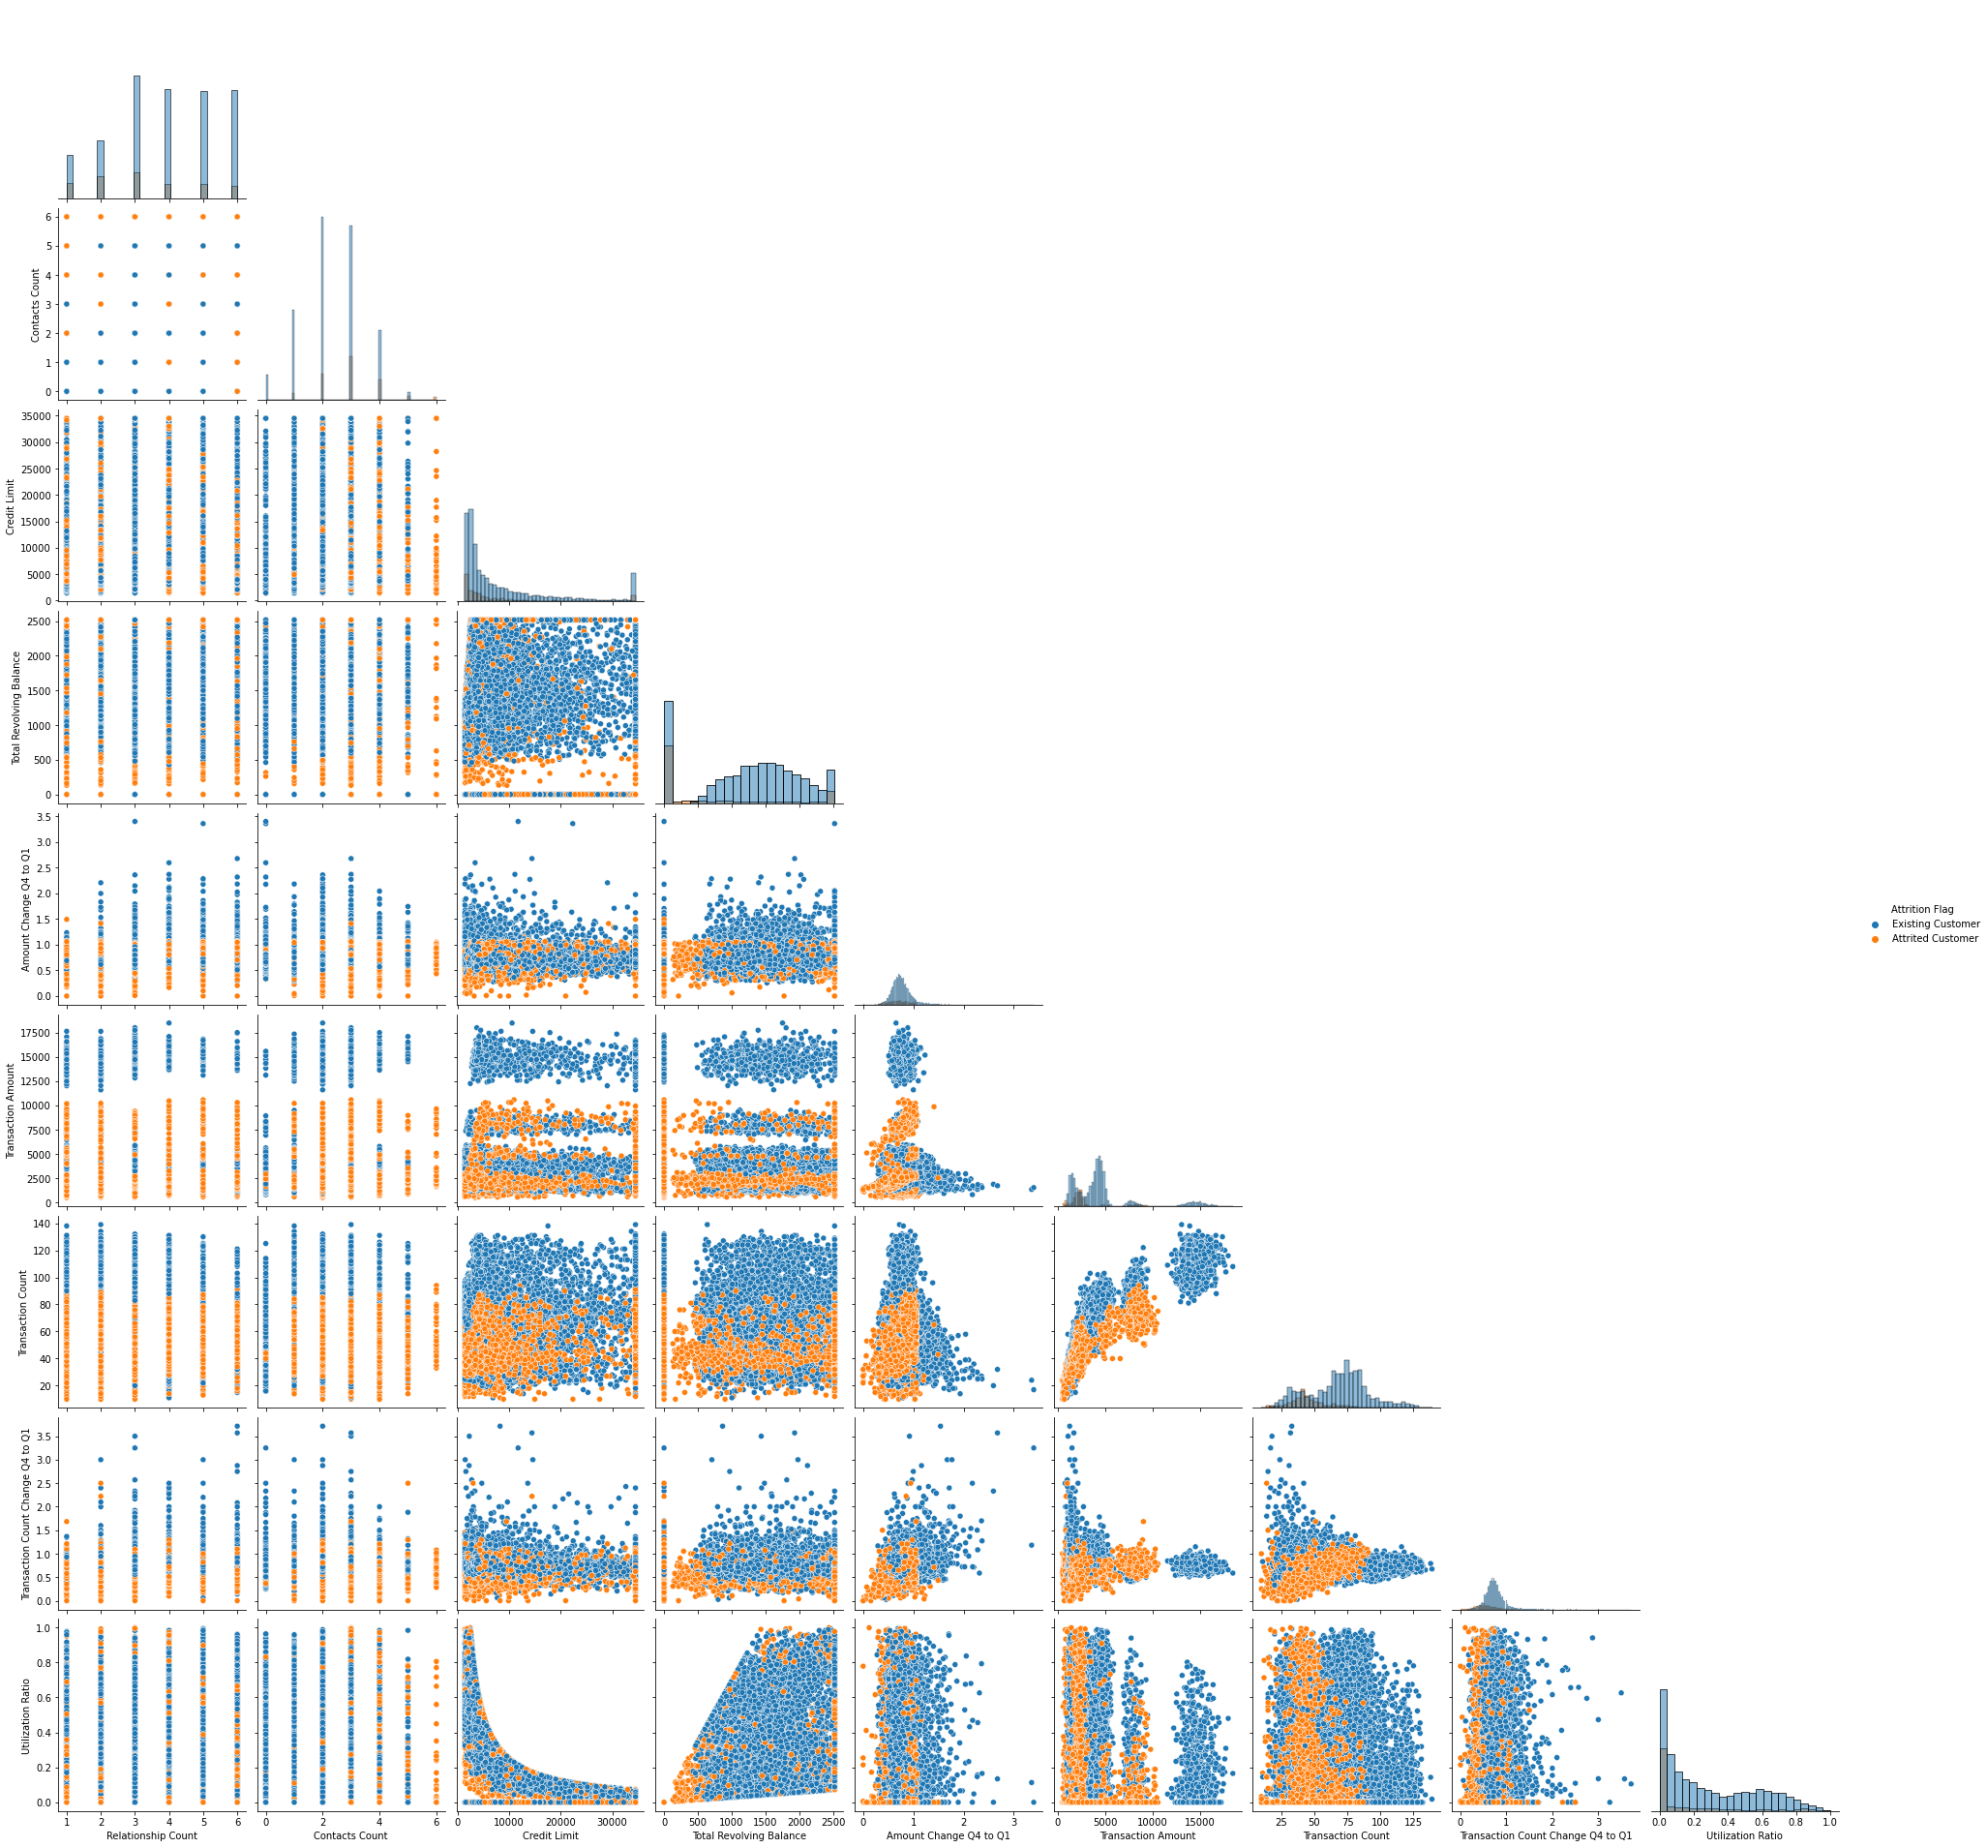

In [13]:
sns.pairplot(
    dataset,
    hue = "Attrition Flag",
    x_vars=["Relationship Count", 
            "Contacts Count", 
            "Credit Limit",
            "Total Revolving Balance",
            "Amount Change Q4 to Q1",
            "Transaction Amount",
            "Transaction Count",
            "Transaction Count Change Q4 to Q1",
            "Utilization Ratio"
           ],
    y_vars=["Relationship Count", 
            "Contacts Count", 
            "Credit Limit",
            "Total Revolving Balance",
            "Amount Change Q4 to Q1",
            "Transaction Amount",
            "Transaction Count",
            "Transaction Count Change Q4 to Q1",
            "Utilization Ratio"
           ],
    diag_kind="hist",
    corner = True,
    height = 3
)

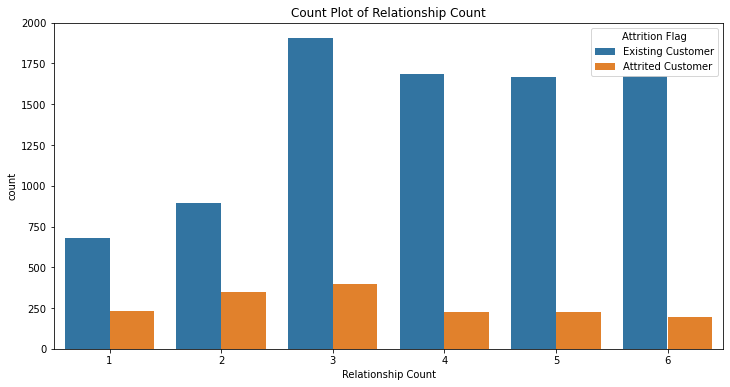

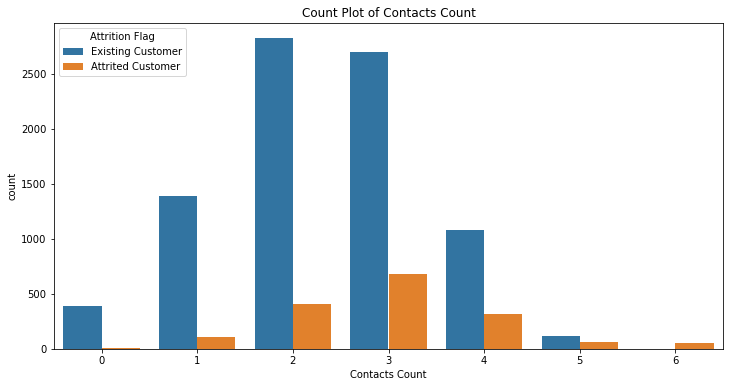

In [14]:
features = ["Relationship Count", "Contacts Count"]

for feature in features:
    #Plotting a countplot with subcategories
    plt.subplots(figsize=(12, 6))
    sns.countplot(x = feature, hue = "Attrition Flag", data = dataset)
    plt.title("Count Plot of " + feature)
    #plt.xticks(rotation=30)
    plt.show()
    plt.close()

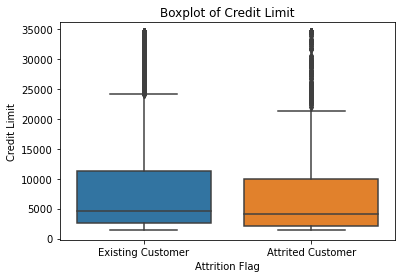

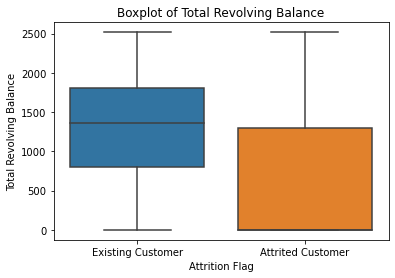

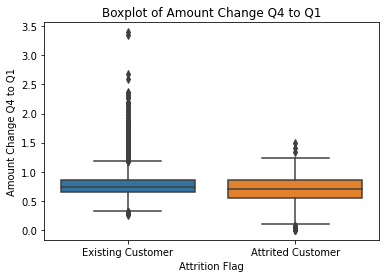

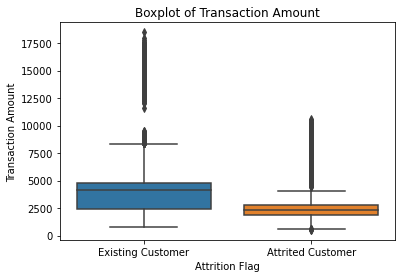

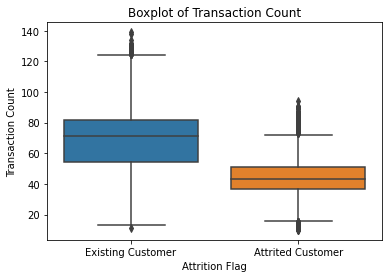

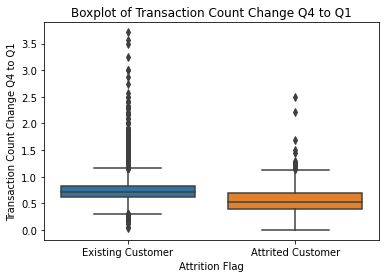

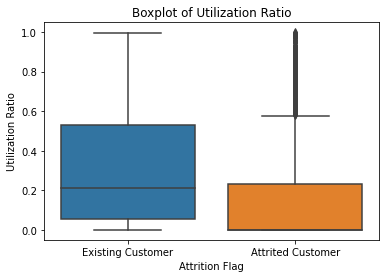

In [15]:
#Plotting a series of boxplots
for feature in ["Credit Limit", "Total Revolving Balance", "Amount Change Q4 to Q1", 
                "Transaction Amount", "Transaction Count", "Transaction Count Change Q4 to Q1", 
               "Utilization Ratio"]:
    plt.subplots(figsize=(6, 4))
    sns.boxplot(x = "Attrition Flag", y = feature, data = dataset)
    plt.title("Boxplot of "+ feature)
    plt.show()
    plt.close()

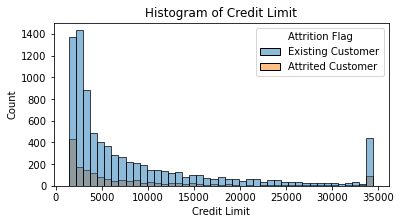

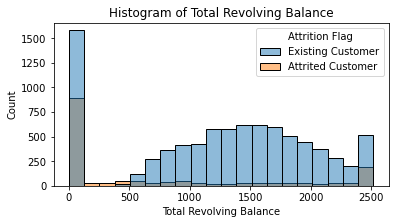

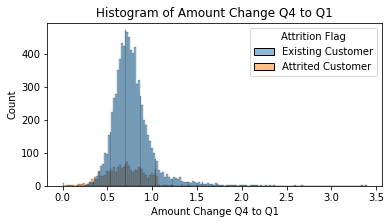

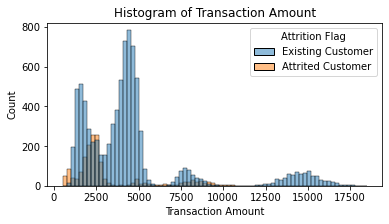

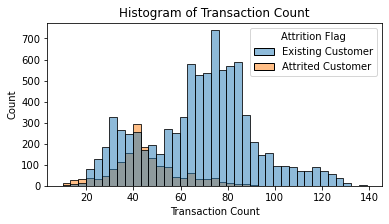

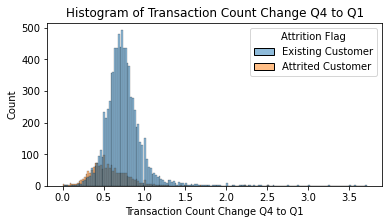

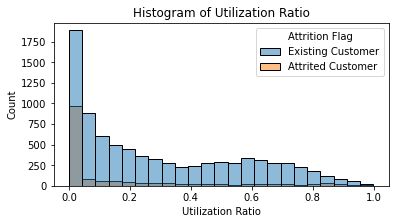

In [16]:
#Plotting a series of histograms
for feature in ["Credit Limit", "Total Revolving Balance", "Amount Change Q4 to Q1", 
                "Transaction Amount", "Transaction Count", "Transaction Count Change Q4 to Q1", 
               "Utilization Ratio"]:
    plt.subplots(figsize=(6, 3))
    sns.histplot(x = feature, data = dataset, hue = "Attrition Flag")
    plt.title("Histogram of "+ feature)
    plt.show()
    plt.close()

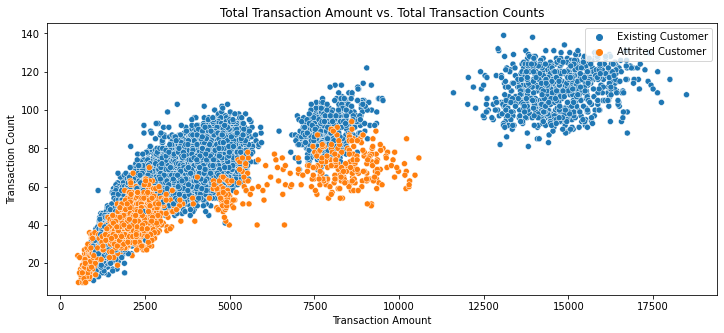

In [17]:
#Plotting a scatter plot with subcategories
plt.subplots(figsize=(12, 5))
sns.scatterplot(x = "Transaction Amount", y = "Transaction Count", hue = "Attrition Flag", data = dataset)
plt.title("Total Transaction Amount vs. Total Transaction Counts")
plt.legend(loc = "upper right")
plt.show()
plt.close()

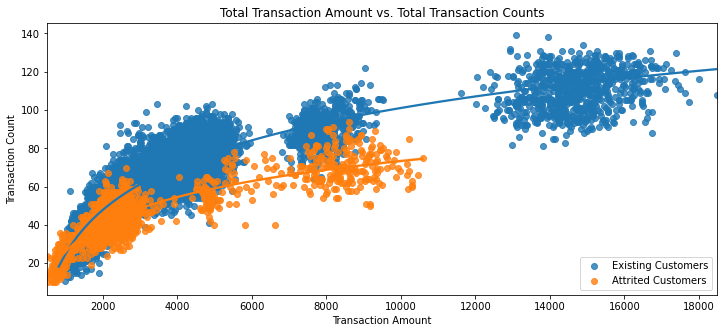

In [18]:
#Plotting a regression plot for each subcategory (Regression = Log)
plt.subplots(figsize=(12, 5))
sns.regplot(x = "Transaction Amount", y = "Transaction Count", data = existing_dataset, 
            logx = True, label = "Existing Customers")
sns.regplot(x = "Transaction Amount", y = "Transaction Count", data = attrited_dataset, 
            logx = True, label = "Attrited Customers")
plt.title("Total Transaction Amount vs. Total Transaction Counts")
plt.legend(loc = "lower right")
plt.show()
plt.close()

# Preprocessing the dataset for machine learning

We are now familiar with the dataset, and it is time to preprocess the dataset and prepare it for the machine learning learning model. 

As mentioned previously, this dataset is very clean. However, the Attrition Flag feature we are trying to predict is imbalanced  (16% attrited customers, 84% existing customers), and this needs to be accounted for. As such, the preprocessing will involve two major aspects: 
* Up-sampling the attrited customer class (https://elitedatascience.com/imbalanced-classes)
* Converting all the non-numeric values into numeric ones
* Splitting the features into X and Y
* Scaling features using Robust Scaler (https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35) 
* Splitting the dataset into a training anf testing dataset


## Up-sampling attrited customer class

In [36]:
#Coming Soon

#https://elitedatascience.com/imbalanced-classes

from sklearn.utils import resample

# Upsample minority class
attrited_upsampled = resample(attrited_dataset, 
                              replace=True,      # sample with replacement
                              n_samples=8500,    # to match majority class
                              random_state=123)  # reproducible results
 
# Combine majority class with upsampled minority class
dataset_upsampled = pd.concat([existing_dataset, attrited_upsampled])
 
# Display new class counts
dataset_upsampled["Attrition Flag"].value_counts()

Existing Customer    8500
Attrited Customer    8500
Name: Attrition Flag, dtype: int64

## Coverting non-numeric data to numeric data

In [37]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in dataset_upsampled.columns:
    # Compare if the dtype is object
    if dataset_upsampled[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        dataset_upsampled[col]=le.fit_transform(dataset_upsampled[col])

In [38]:
dataset_upsampled.head()

,Attrition Flag,Age,Gender,Dependent Count,Education Level,Marital Status,Income Category,Card Category,Months on Book,Relationship Count,Inactive Months,Contacts Count,Credit Limit,Total Revolving Balance,Average Open to Buy,Amount Change Q4 to Q1,Transaction Amount,Transaction Count,Transaction Count Change Q4 to Q1,Utilization Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [39]:
dataset_upsampled.tail()

,Attrition Flag,Age,Gender,Dependent Count,Education Level,Marital Status,Income Category,Card Category,Months on Book,Relationship Count,Inactive Months,Contacts Count,Credit Limit,Total Revolving Balance,Average Open to Buy,Amount Change Q4 to Q1,Transaction Amount,Transaction Count,Transaction Count Change Q4 to Q1,Utilization Ratio
887,0,56,1,3,3,2,2,0,45,2,1,3,8512.0,0,8512.0,1.038,811,27,1.250,0.000
1257,0,49,0,2,2,2,4,0,31,5,1,2,5456.0,951,4505.0,0.737,1096,27,0.588,0.174
1655,0,26,1,0,3,2,1,0,15,3,1,3,3324.0,0,3324.0,0.537,982,22,0.692,0.000
7738,0,54,0,1,2,2,4,0,34,5,2,2,2939.0,2152,787.0,0.555,2476,42,0.355,0.732
7810,0,47,0,4,2,2,4,0,39,3,3,6,1438.3,0,1438.3,0.854,2295,51,0.545,0.000


## Splitting features into X and Y

In [40]:
X = dataset_upsampled.drop("Attrition Flag", axis = 1)
print("Number of Samples in X: ", len(X))
y = dataset_upsampled["Attrition Flag"]
print("Number of Samples in Y: ", len(y))

Number of Samples in X:  17000
Number of Samples in Y:  17000


## Scaling features using robust scaler

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

## Splitting dataset into training and testing datasets

In [42]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, #The testing dataset is 20% of the training dataset
    shuffle=True, #The dataset is shuffled so you do not get a training dataset that is mostly O or mostly R 
    random_state=42,
)

In [43]:
train_value = y_train.value_counts()
test_value = y_test.value_counts()

print("Number of data points in y_train: ", len(y_train))
print("Percentage of Existing Customers: ", "{:.2%}".format(train_value[1]/len(y_train)))
print("Percentage of Attrited Customers: ", "{:.2%}".format(train_value[0]/len(y_train)))
print("\n")
print("Number of data points in y_test: ", len(y_test))
print("Percentage of Existing Customers: ", "{:.2%}".format(test_value[1]/len(y_test)))
print("Percentage of Attrited Customers: ", "{:.2%}".format(test_value[0]/len(y_test)))

Number of data points in y_train:  13600
Percentage of Existing Customers:  50.10%
Percentage of Attrited Customers:  49.90%


Number of data points in y_test:  3400
Percentage of Existing Customers:  49.62%
Percentage of Attrited Customers:  50.38%


# Training a logistic regression model

In [44]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'tol': [0.1, 0.01, 0.001, 0.0001],
              'max_iter': [50, 100, 150, 200]}
logreg_grid = GridSearchCV(logreg, param_grid)

logreg_grid.fit(X_train, y_train)
print(logreg_grid.best_params_)

{'max_iter': 50, 'tol': 0.1}


In [46]:
from sklearn.metrics import roc_auc_score

logreg_model = logreg_grid.best_estimator_

y_train_pred = logreg_model.predict(X_train)
y_train_pred_prob = logreg_model.predict_proba(X_train)

y_train_pred_prob = [p[1] for p in y_train_pred_prob]

print("Training accuracy of logistic regression classifier: ", logreg_model.score(X_train, y_train))
print("AUROC of Model: ", roc_auc_score(y_train, y_train_pred_prob))

Training accuracy of logistic regression classifier:  0.8438970588235294
AUROC of Model:  0.9246852134905078


In [47]:
y_pred = logreg_model.predict(X_test)
y_pred_prob = logreg_model.predict_proba(X_test)

y_pred_prob = [p[1] for p in y_pred_prob]

# Get the accuracy score of logreg model and print it
print("Testing accuracy of logistic regression classifier: ", logreg_model.score(X_test, y_test))
print("AUROC of Model: ", roc_auc_score(y_test, y_pred_prob))

Testing accuracy of logistic regression classifier:  0.836764705882353
AUROC of Model:  0.9295349797271882


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1713
           1       0.83      0.84      0.84      1687

    accuracy                           0.84      3400
   macro avg       0.84      0.84      0.84      3400
weighted avg       0.84      0.84      0.84      3400



Text(17.880000000000003, 0.5, 'predicted label')

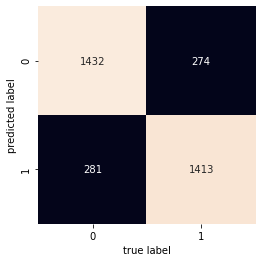

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(4,4))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Training a support vector classifier

In [50]:
from sklearn.svm import SVC

svc = SVC(probability=True)                                         

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50]}
svc_grid = GridSearchCV(svc, param_grid)

svc_grid.fit(X_train, y_train)
print(svc_grid.best_params_)

{'C': 50}


In [54]:
svc_model = svc_grid.best_estimator_
y_train_pred = svc_model.predict(X_train)
y_train_pred_prob = svc_model.predict_proba(X_train)

y_train_pred_prob = [p[1] for p in y_train_pred_prob]

print("Training accuracy of logistic regression classifier: ", svc_model.score(X_train, y_train))
print("AUROC of Model: ", roc_auc_score(y_train, y_train_pred_prob))

Training accuracy of logistic regression classifier:  0.9916176470588235
AUROC of Model:  0.9985355915336283


In [55]:
y_pred = svc_model.predict(X_test)
y_pred_prob = svc_model.predict_proba(X_test)

y_pred_prob = [p[1] for p in y_pred_prob]

# Get the accuracy score of logreg model and print it
print("Testing accuracy of logistic regression classifier: ", svc_model.score(X_test, y_test))
print("AUROC of Model: ", roc_auc_score(y_test, y_pred_prob))

Testing accuracy of logistic regression classifier:  0.9747058823529412
AUROC of Model:  0.9926611625385706


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1713
           1       0.99      0.96      0.97      1687

    accuracy                           0.97      3400
   macro avg       0.98      0.97      0.97      3400
weighted avg       0.97      0.97      0.97      3400



Text(17.880000000000003, 0.5, 'predicted label')

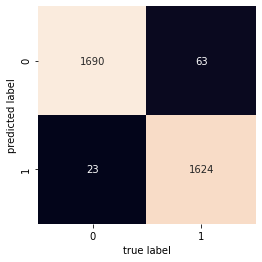

In [57]:
plt.figure(figsize=(4,4))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Training a random forest classifier 

In [58]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

In [59]:
randomforest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20, 50, 100, 200, 300, 400]}
forest_grid = GridSearchCV(randomforest, param_grid)

forest_grid.fit(X_train, y_train)
print(forest_grid.best_params_)

{'n_estimators': 400}


In [61]:
forest_model = forest_grid.best_estimator_
y_train_pred = forest_model.predict(X_train)
y_train_pred_prob = forest_model.predict_proba(X_train)

y_train_pred_prob = [p[1] for p in y_train_pred_prob]

print("Training accuracy of logistic regression classifier: ", forest_model.score(X_train, y_train))
print("AUROC of Model: ", roc_auc_score(y_train, y_train_pred_prob))

Training accuracy of logistic regression classifier:  1.0
AUROC of Model:  1.0


In [62]:
y_pred = forest_model.predict(X_test)
y_pred_prob = forest_model.predict_proba(X_test)

y_pred_prob = [p[1] for p in y_pred_prob]

# Get the accuracy score of logreg model and print it
print("Testing accuracy of logistic regression classifier: ", forest_model.score(X_test, y_test))
print("AUROC of Model: ", roc_auc_score(y_test, y_pred_prob))

Testing accuracy of logistic regression classifier:  0.9864705882352941
AUROC of Model:  0.999807947246742


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1713
           1       1.00      0.98      0.99      1687

    accuracy                           0.99      3400
   macro avg       0.99      0.99      0.99      3400
weighted avg       0.99      0.99      0.99      3400



Text(17.880000000000003, 0.5, 'predicted label')

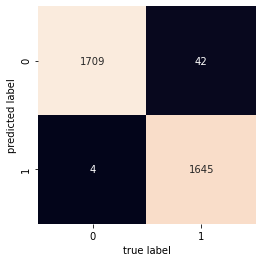

In [64]:
plt.figure(figsize=(4,4))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Saving the model for future use

So, we have tested different models, and now we have the best one. It is time to save it so we can use it any time we want without having to recreate it.

In [ ]:
import joblib

filename = 'final_model.sav'
joblib.dump(forest_model, filename)

# Loading the model from the computer

In this section, we will load the model that we saved in the previous section.

In [ ]:
filename = 'final_model.sav'
loaded_model = joblib.load(filename)

# Using the model to predict the Attrition Flag of new customers

In this section, we will use the model we created to predict whether a new customer will leave the credit card service or not.

In [ ]:
new_features = {
    "Age": [25], 
    "Gender": ["F"], 
    "Dependent Count": [0], 
    "Education Level": ["College"],
    "Marital Status": ["Single"],
    "Income Category": ["Less than $40K"], 
    "Card Category": ["Blue"],
    "Months on Book": [14], 
    "Relationship Count": [4],
    "Inactive Months": [3], 
    "Contacts Count": [3],
    "Credit Limit": [2000],
    "Total Revolving Balance": [6000],
    "Average Open to Buy": [7469],
    "Amount Change Q4 to Q1": [0.76],
    "Transaction Amount": [4404],
    "Transaction Count": [60], 
    "Transaction Count Change Q4 to Q1": [0.70],
    "Utilization Ratio": [0.27]
              }

new_customer = pd.DataFrame(new_features)
#new_customer = attrited_dataset.drop("Attrition Flag", axis = 1)

print(new_customer)

# Iterate over all the values of each column and extract their dtypes
for col in new_customer.columns:
    # Compare if the dtype is object
    if new_customer[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        new_customer[col]=le.fit_transform(new_customer[col])

new_customer_scaled = scaler.fit_transform(new_customer)


In [ ]:
#Use the model to predict the label of the customer 
prediction = loaded_model.predict(new_customer_scaled) 
#if prediction == 1:
    #print("Existing Customer")
#else:
    #print("Attrited Customer")

import numpy as np
with np.printoptions(threshold=np.inf):
    print(prediction)
